# Integrated CA2 (DVT and MLB)

### Hugo Guimaraes Gontijo

Assessment details

1) Discuss and explain the purpose of a recommendation system for online retail business in machine
learning. Briefly compare Content and Collaborative filtering using any dataset of your choice (Datasets used
in the class tutorials or exercises are not allowed to use in this CA2). Train and test machine learning models
for the user-user and item-item collaborative filtering. Justify your recommendations for the considered
scenario by providing a conceptual insight.

2) Perform Market Basket Analysis on the chosen dataset by using Apriori and FP growth algorithms. Can
you express major similarities/ divergence between these models? Compare and contrast the machine
learning results obtained based on both algorithms.

3) Create an interactive Dashboard aimed at younger adults (18 - 35 years) with specific features to
summarise the most important aspects of the data and identify through your visualisation why this dataset
is suitable for Machine Learning models in an online retail business. Explain how your dashboard is designed
with this demographic in mind.

4) Discuss in detail your rationale and justification for all stages of data preparation for your visualizations.

Kaggle Dataset: The Bread Basket - 
https://www.kaggle.com/datasets/mittalvasu95/the-bread-basket

https://github.com/HugoGontijo/Machine-Learning-for-Business

# Importing the dataset and aplying the EDA

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [10]:
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [11]:
bread = pd.read_csv("bread basket.csv")

In [12]:
bread.head(10)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
5,3,Cookies,30-10-2016 10:07,morning,weekend
6,4,Muffin,30-10-2016 10:08,morning,weekend
7,5,Coffee,30-10-2016 10:13,morning,weekend
8,5,Pastry,30-10-2016 10:13,morning,weekend
9,5,Bread,30-10-2016 10:13,morning,weekend


In [13]:
bread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [14]:
bread.shape

(20507, 5)

In [15]:
bread['date_time'] = pd.to_datetime(bread['date_time'], format='%d-%m-%Y %H:%M')

In [16]:
bread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


In [17]:
bread['date'] = bread['date_time'].dt.date

In [18]:
bread['time'] = bread['date_time'].dt.time

In [19]:
bread['month'] = bread['date_time'].dt.month

In [20]:
bread['month'] = bread['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                        ('January','February','March','April','May','June','July','August',
                                        'September','October','November','December'))

In [21]:
bread['hour'] = bread['date_time'].dt.hour

In [22]:
hour_counts = bread['date_time'].dt.hour.value_counts().sort_index()
print(hour_counts)

date_time
1        1
7       24
8      645
9     1966
10    2666
11    3102
12    2854
13    2617
14    2640
15    2115
16    1343
17     368
18      82
19      48
20      22
21       3
22       8
23       3
Name: count, dtype: int64


In [23]:
bread['weekday'] = bread['date_time'].dt.weekday

In [24]:
bread['weekday'] = bread['weekday'].replace((0,1,2,3,4,5,6), 
                                        ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

In [25]:
bread.weekday.value_counts()

weekday
Saturday     4605
Friday       3124
Sunday       3095
Thursday     2646
Tuesday      2392
Monday       2324
Wednesday    2321
Name: count, dtype: int64

In [26]:
bread.drop('date_time', axis = 1, inplace = True)

In [27]:
bread.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10,Sunday


In [28]:
bread = bread.rename(columns={'period_day': 'Period Day', 'weekday_weekend': 'Weekday/Weekend', 'date': 'Date', 'time': 'Time', 'month': 'Month', 'hour': 'Hour', 'weekday': 'Day'})

In [29]:
bread.head()

,Transaction,Item,Period Day,Weekday/Weekend,Date,Time,Month,Hour,Day
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10,Sunday


In [30]:
bre = bread.copy()

In [31]:
hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
            '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
bread['Hour'] = bread['Hour'].replace(hour_in_num, hour_in_obj)

In [32]:
bread.head()

,Transaction,Item,Period Day,Weekday/Weekend,Date,Time,Month,Hour,Day
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [33]:
bread['Item'].value_counts()

Item
Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: count, Length: 94, dtype: int64

In [34]:
bread.isnull().sum()

Transaction        0
Item               0
Period Day         0
Weekday/Weekend    0
Date               0
Time               0
Month              0
Hour               0
Day                0
dtype: int64

In [35]:
bread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   Period Day       20507 non-null  object
 3   Weekday/Weekend  20507 non-null  object
 4   Date             20507 non-null  object
 5   Time             20507 non-null  object
 6   Month            20507 non-null  object
 7   Hour             20507 non-null  object
 8   Day              20507 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.4+ MB


In [36]:
df = bread.copy()

In [37]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Create an object te by calling a method TransactionEncoder()
te = TransactionEncoder()

# Call fit() method to train the model
te_array = te.fit(df).transform(df)

# Transform te_array into dataframe
df1 = pd.DataFrame(te_array, columns = te.columns_)

In [38]:
df1.head()

,,/,D,H,I,M,P,T,W,a,...,i,k,m,n,o,r,s,t,u,y
0,False,False,False,False,False,False,False,True,False,True,...,True,False,False,True,True,True,True,True,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,True,False,True,False,False,False,True,False,False,True,...,True,False,False,False,True,True,False,False,False,True
3,False,True,False,False,False,False,False,False,True,True,...,False,True,False,True,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


# Market Basket Analysis - Apriori

In [40]:
from mlxtend.frequent_patterns import association_rules, apriori

# Calculate the sfrequenct itemsets by calling a method apriori
frequent_itemsets_ap = apriori(df1, min_support = 0.01, use_colnames = True)

In [41]:
print(frequent_itemsets_ap)

Empty DataFrame
Columns: [support, itemsets]
Index: []


In [42]:
!pip install -U mlxtend

/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=30425) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


In [43]:
transactions_str = bread.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')

In [44]:
transactions_str

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [45]:
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)

In [46]:
my_basket.head(10)

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
my_basket.tail(10)

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
9674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
bread1 = my_basket_sets.copy()

In [50]:
fp = my_basket_sets.copy()

In [51]:
frequent_itemsets_ap = apriori(bread1, min_support = 0.01, use_colnames = True)

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [52]:
print(frequent_itemsets_ap)

     support                 itemsets
0   0.036344              (Alfajores)
1   0.016059               (Baguette)
2   0.327205                  (Bread)
3   0.040042                (Brownie)
4   0.103856                   (Cake)
..       ...                      ...
56  0.023666          (Coffee, Toast)
57  0.014369          (Sandwich, Tea)
58  0.010037    (Coffee, Bread, Cake)
59  0.011199  (Coffee, Bread, Pastry)
60  0.010037      (Coffee, Cake, Tea)

[61 rows x 2 columns]


In [53]:
# Display the reles due to apriori algorithm
rules_ap = association_rules(frequent_itemsets_ap, metric = "confidence", min_threshold = 0.01, num_itemsets = 1)

In [54]:
rules_ap

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,1.0,-0.001538,0.940818,-0.133570,0.029315,-0.062904,0.158264
1,(Bread),(Alfajores),0.327205,0.036344,0.010354,0.031644,0.870657,1.0,-0.001538,0.995145,-0.180870,0.029315,-0.004878,0.158264
2,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,1.0,0.002264,1.004936,0.220910,0.039693,0.004912,0.290888
3,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,1.0,0.002264,1.135648,0.119574,0.039693,0.119446,0.290888
4,(Brownie),(Bread),0.040042,0.327205,0.010777,0.269129,0.822508,1.0,-0.002326,0.920538,-0.183536,0.030231,-0.086321,0.151032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,1.0,0.004858,1.121962,0.509401,0.069853,0.108705,0.148957
70,"(Cake, Tea)",(Coffee),0.023772,0.478394,0.010037,0.422222,0.882582,1.0,-0.001335,0.902779,-0.119934,0.020395,-0.107690,0.221601
71,(Coffee),"(Cake, Tea)",0.478394,0.023772,0.010037,0.020981,0.882582,1.0,-0.001335,0.997149,-0.203223,0.020395,-0.002859,0.221601
72,(Cake),"(Coffee, Tea)",0.103856,0.049868,0.010037,0.096643,1.937977,1.0,0.004858,1.051779,0.540090,0.069853,0.049230,0.148957


In [55]:
rules_ap1 = association_rules(frequent_itemsets_ap, metric = "lift", min_threshold = 1, num_itemsets = 1)
rules_ap1.sort_values('confidence', ascending = False, inplace = True)

In [56]:
rules_ap1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,1.0,0.002189,1.300235,0.204851,0.022406,0.230908,0.310792
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,1.0,0.005614,1.210871,0.170091,0.069665,0.174148,0.321387
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,1.0,0.002264,1.135648,0.119574,0.039693,0.119446,0.290888
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,1.0,0.002154,1.119919,0.108738,0.041507,0.107078,0.288656
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,1.0,0.003877,1.115384,0.109205,0.074701,0.103448,0.306150
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,1.0,0.001539,1.093366,0.088224,0.036507,0.085393,0.280350
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707


In [57]:
rules_ap2 = association_rules(frequent_itemsets_ap, metric = "lift", min_threshold = 1, num_itemsets = 1)
rules_ap2.sort_values('lift', ascending = False, inplace = True)

In [58]:
rules_ap2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
40,(Cake),"(Coffee, Tea)",0.103856,0.049868,0.010037,0.096643,1.937977,1.0,0.004858,1.051779,0.540090,0.069853,0.049230,0.148957
39,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,1.0,0.004858,1.121962,0.509401,0.069853,0.108705,0.148957
8,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,1.0,0.005354,1.057910,0.523553,0.075683,0.054740,0.152760
9,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,1.0,0.005354,1.114125,0.498236,0.075683,0.102434,0.152760
11,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,1.0,0.008959,1.075372,0.439556,0.106736,0.070090,0.197779
10,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,1.0,0.008959,1.111865,0.420538,0.106736,0.100611,0.197779
30,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,1.0,0.007593,1.016699,0.615122,0.048464,0.016424,0.376936
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
37,(Pastry),"(Coffee, Bread)",0.086107,0.090016,0.011199,0.130061,1.444872,1.0,0.003448,1.046033,0.336907,0.067905,0.044007,0.127237
36,"(Coffee, Bread)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,1.0,0.003448,1.043749,0.338354,0.067905,0.041916,0.127237


In [59]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import time

start_time = time.time()

frequent_itemsets_ap = apriori(my_basket_sets, min_support=0.01, use_colnames=True)

rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1, num_itemsets = 100)

end_time = time.time()

calculation_time = end_time - start_time

print("Association rules calculated in {:.2f} seconds.".format(calculation_time))

Association rules calculated in 0.02 seconds.


/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# Market Basket Analysis - FP-growth algorithm

In [61]:
from mlxtend.frequent_patterns import fpgrowth

In [62]:
frequent_itemsets_fp = fpgrowth(fp, min_support = 0.01, use_colnames = True)

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [63]:
frequent_itemsets_fp

,support,itemsets
0,0.327205,(Bread)
1,0.029054,(Scandinavian)
2,0.058320,(Hot chocolate)
3,0.054411,(Cookies)
4,0.015003,(Jam)
...,...,...
56,0.019651,"(Brownie, Coffee)"
57,0.010777,"(Brownie, Bread)"
58,0.023666,"(Coffee, Toast)"
59,0.018067,"(Coffee, Scone)"


In [64]:
from mlxtend.frequent_patterns import association_rules

In [65]:
rules_fp = association_rules(frequent_itemsets_fp, metric = "confidence", min_threshold = 0.1, num_itemsets = 1)

In [66]:
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,1.0,-0.066517,0.828731,-0.586210,0.125794,-0.206665,0.231634
1,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,1.0,-0.066517,0.719561,-0.523431,0.125794,-0.389737,0.231634
2,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,1.0,0.001683,1.058553,0.060403,0.058333,0.055314,0.284542
3,(Hot chocolate),(Bread),0.058320,0.327205,0.013418,0.230072,0.703144,1.0,-0.005665,0.873841,-0.309550,0.036059,-0.144373,0.135540
4,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,1.0,0.005354,1.057910,0.523553,0.075683,0.054740,0.152760
5,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,1.0,0.005354,1.114125,0.498236,0.075683,0.102434,0.152760
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707
7,(Cookies),(Bread),0.054411,0.327205,0.014474,0.266019,0.813004,1.0,-0.003329,0.916638,-0.195651,0.039424,-0.090943,0.155128
8,(Muffin),(Coffee),0.038457,0.478394,0.018806,0.489011,1.022193,1.0,0.000408,1.020777,0.022579,0.037760,0.020354,0.264161
9,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764


In [67]:
rules_fp.sort_values('lift', ascending = False, inplace = True)

In [68]:
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
28,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,1.0,0.004858,1.121962,0.509401,0.069853,0.108705,0.148957
4,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,1.0,0.005354,1.057910,0.523553,0.075683,0.054740,0.152760
5,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,1.0,0.005354,1.114125,0.498236,0.075683,0.102434,0.152760
25,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,1.0,0.008959,1.075372,0.439556,0.106736,0.070090,0.197779
24,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,1.0,0.008959,1.111865,0.420538,0.106736,0.100611,0.197779
41,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
14,(Pastry),"(Coffee, Bread)",0.086107,0.090016,0.011199,0.130061,1.444872,1.0,0.003448,1.046033,0.336907,0.067905,0.044007,0.127237
11,"(Coffee, Bread)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,1.0,0.003448,1.043749,0.338354,0.067905,0.041916,0.127237
34,(Tea),(Sandwich),0.142631,0.071844,0.014369,0.100741,1.402222,1.0,0.004122,1.032134,0.334566,0.071806,0.031134,0.150370
33,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,1.0,0.004122,1.071712,0.309050,0.071806,0.066913,0.150370


In [69]:
rules_fp1 = association_rules(frequent_itemsets_fp, metric = "confidence", min_threshold = 0.1, num_itemsets = 1)

In [70]:
rules_fp1.sort_values('confidence', ascending = False, inplace = True)

In [71]:
rules_fp1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
41,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,1.0,0.007593,1.764582,0.332006,0.048464,0.433293,0.376936
43,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,1.0,0.002189,1.300235,0.204851,0.022406,0.230908,0.310792
15,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,1.0,0.005614,1.210871,0.170091,0.069665,0.174148,0.321387
9,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,1.0,0.006351,1.164682,0.146161,0.091968,0.141396,0.325764
37,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,1.0,0.002264,1.135648,0.119574,0.039693,0.119446,0.290888
20,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,1.0,0.002154,1.119919,0.108738,0.041507,0.107078,0.288656
36,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,1.0,0.003877,1.115384,0.109205,0.074701,0.103448,0.306150
23,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,1.0,0.005044,1.102664,0.102840,0.103745,0.093105,0.320679
42,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,1.0,0.001539,1.093366,0.088224,0.036507,0.085393,0.280350
6,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,1.0,0.002179,1.083174,0.081700,0.055905,0.076787,0.288707


In [72]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import time

start_time = time.time()

frequent_itemsets_ap = fpgrowth(my_basket_sets, min_support=0.01, use_colnames=True)

rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.01, num_itemsets = 100)

end_time = time.time()

calculation_time = end_time - start_time

print("Association rules calculated in {:.2f} seconds.".format(calculation_time))

/opt/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association rules calculated in 0.37 seconds.


# Data Visualisation

In [74]:
bread.head()

,Transaction,Item,Period Day,Weekday/Weekend,Date,Time,Month,Hour,Day
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [75]:
bread.Day.value_counts()

Day
Saturday     4605
Friday       3124
Sunday       3095
Thursday     2646
Tuesday      2392
Monday       2324
Wednesday    2321
Name: count, dtype: int64

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


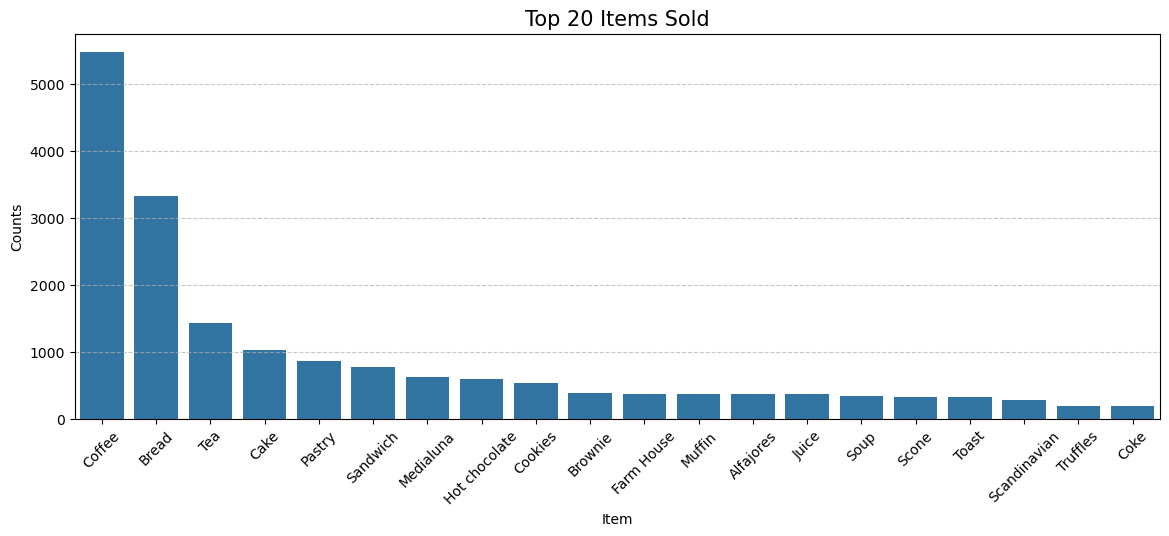

In [76]:
plt.figure(figsize=(14, 5))
sns.barplot(x=bre.Item.value_counts().head(20).index, y=df.Item.value_counts().head(20))
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('Top 20 Items Sold', fontsize=15, color='Black')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show;

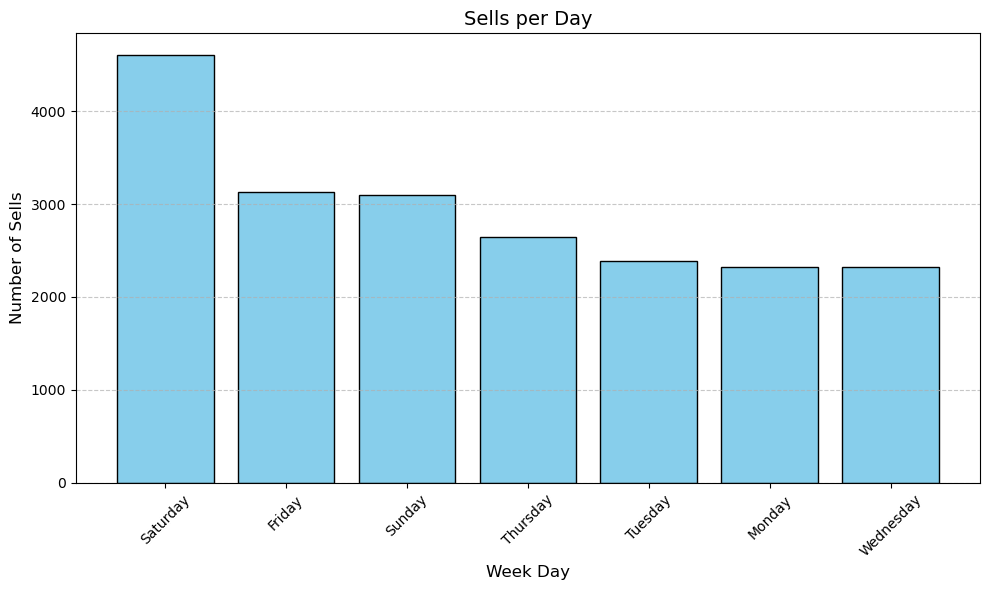

In [77]:
import matplotlib.pyplot as plt

Week_days = ["Saturday", "Friday", "Sunday", "Thursday", "Tuesday", "Monday", "Wednesday"]
Sells = [4605, 3124, 3095, 2646, 2392, 2324, 2321]

plt.figure(figsize=(10, 6))
plt.bar(Week_days, Sells, color='skyblue', edgecolor='black')

plt.title("Sells per Day", fontsize=14)
plt.xlabel("Week Day", fontsize=12)
plt.ylabel("Number of Sells", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show();

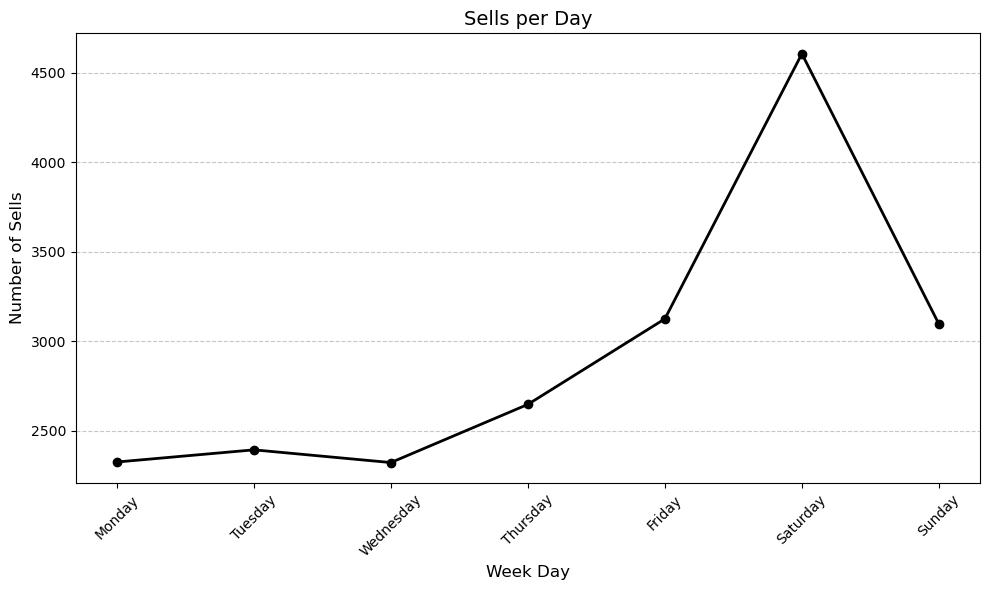

In [78]:
Week_days = ["Saturday", "Friday", "Sunday", "Thursday", "Tuesday", "Monday", "Wednesday"]
Sells = [4605, 3124, 3095, 2646, 2392, 2324, 2321]

ordered_week_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ordered_sells = [Sells[Week_days.index(day)] for day in ordered_week_days]

plt.figure(figsize=(10, 6))
plt.plot(ordered_week_days, ordered_sells, marker='o', color='black', linewidth=2)

# Configurações do gráfico
plt.title("Sells per Day", fontsize=14)
plt.xlabel("Week Day", fontsize=12)
plt.ylabel("Number of Sells", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

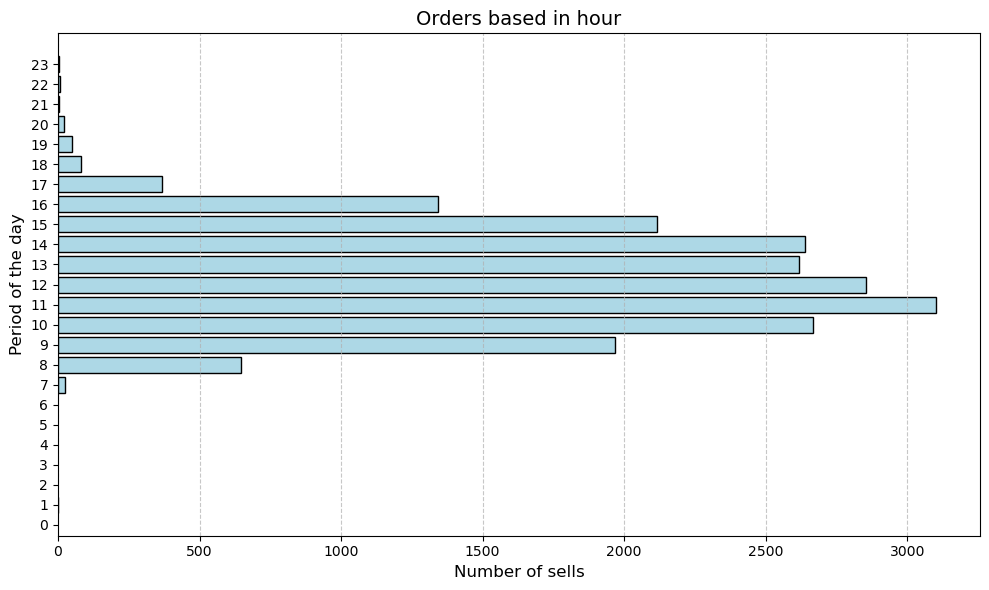

In [79]:
hourly_counts = bre['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.barh(hourly_counts.index, hourly_counts.values, color='lightblue', edgecolor='black')

plt.title("Orders based in hour", fontsize=14)
plt.xlabel("Number of sells", fontsize=12)
plt.ylabel("Period of the day", fontsize=12)
plt.yticks(range(0, 24), fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [80]:
bread.Month.value_counts()

Month
November    4436
March       3944
February    3906
January     3356
December    3339
April       1157
October      369
Name: count, dtype: int64

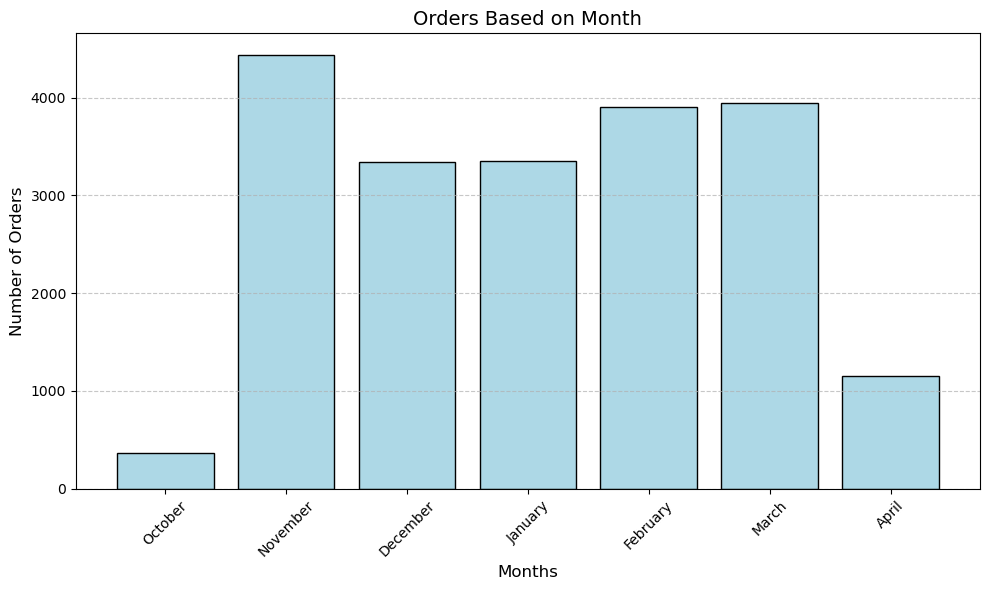

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

month_counts = bre['Month'].value_counts()

order = [
    "October", "November", "December", "January", "February", "March", "April"
]
month_counts = month_counts.reindex(order)

plt.figure(figsize=(10, 6))
plt.bar(month_counts.index, month_counts.values, color='lightblue', edgecolor='black')

plt.title("Orders Based on Month", fontsize=14)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

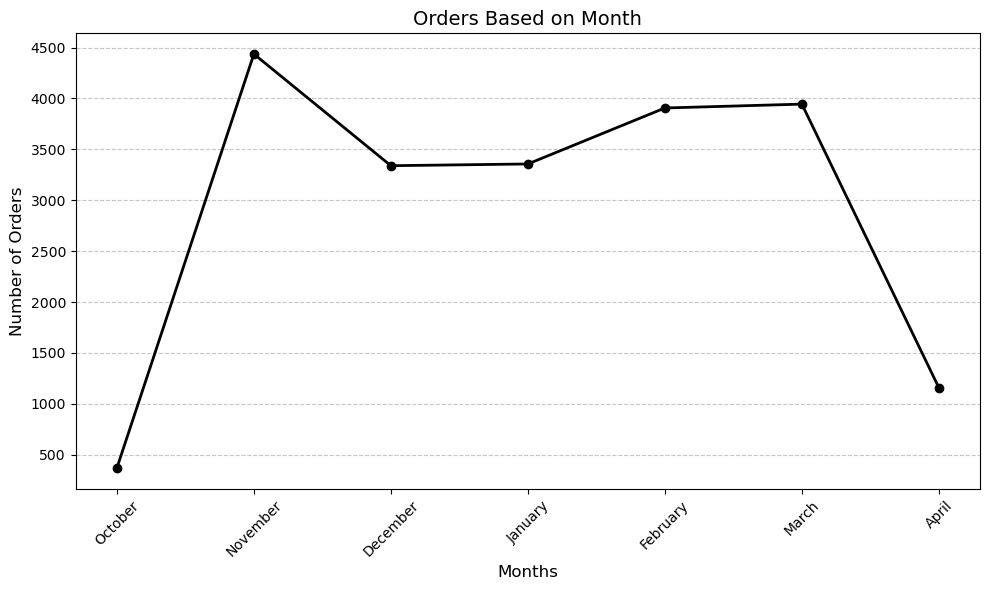

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

month_counts = bre['Month'].value_counts()

order = [
    "October", "November", "December", "January", "February", "March", "April"
]
month_counts = month_counts.reindex(order)

plt.figure(figsize=(10, 6))
plt.plot(month_counts, marker='o', color='black', linewidth=2)

plt.title("Orders Based on Month", fontsize=14)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

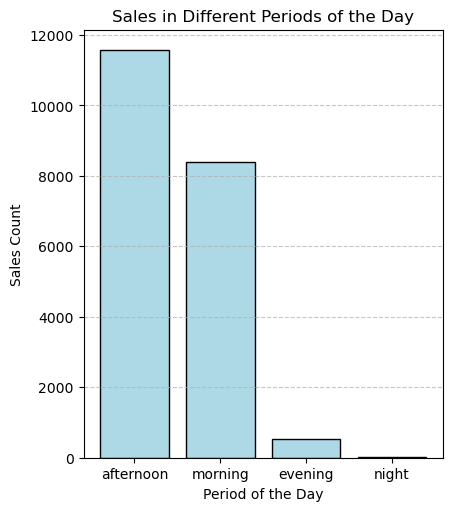

In [83]:
from matplotlib import gridspec

day_type_counts = bre['Day'].value_counts()
period_day_counts = bre['Period Day'].value_counts()

fig = plt.figure(figsize=(8, 5), constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax2 = fig.add_subplot(spec[0, 1])
ax2.bar(period_day_counts.index, period_day_counts.values, color='lightblue', edgecolor='black')
ax2.set_title('Sales in Different Periods of the Day', color='black')
ax2.set_xlabel('Period of the Day')
ax2.set_ylabel('Sales Count')
ax2.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

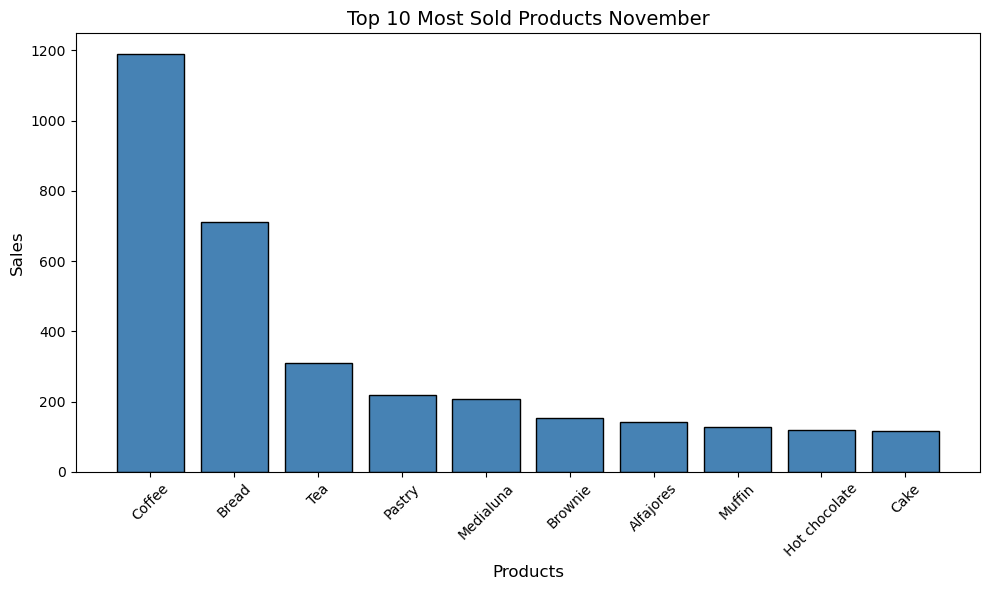

In [84]:
import pandas as pd
import matplotlib.pyplot as plt


November1 = ['November']
filtered_data = bre[bre['Month'].isin(November1)]

item_counts = filtered_data['Item'].value_counts()

top_10_items = item_counts.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_items.index, top_10_items.values, color='steelblue', edgecolor='black')

plt.title('Top 10 Most Sold Products November', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10) 

plt.tight_layout()
plt.show()

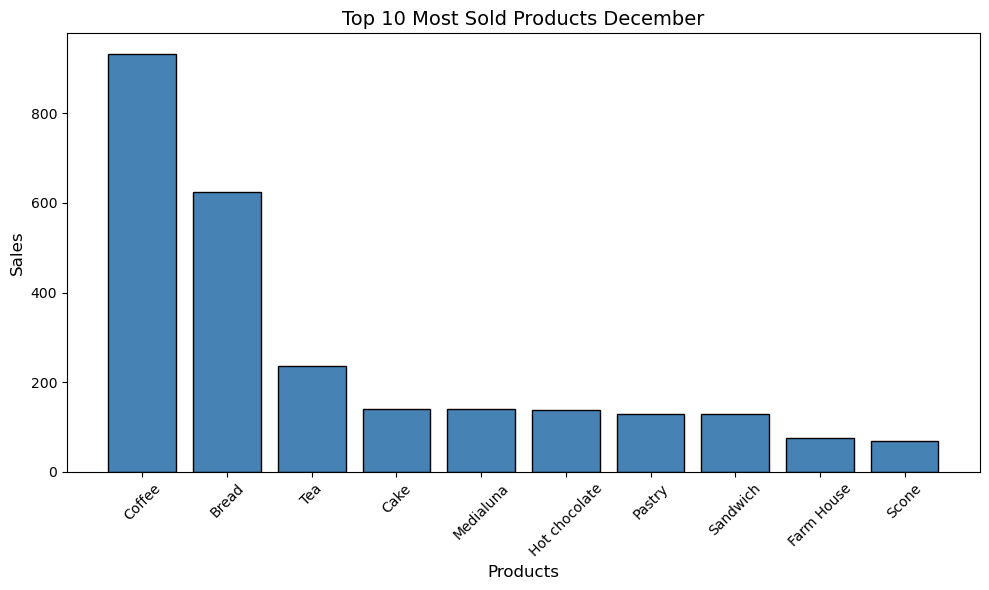

In [85]:
December1 = ['December']
filtered_data = bre[bre['Month'].isin(December1)]

item_counts = filtered_data['Item'].value_counts()

top_10_items = item_counts.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_items.index, top_10_items.values, color='steelblue', edgecolor='black')

plt.title('Top 10 Most Sold Products December', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10) 

plt.tight_layout()
plt.show()

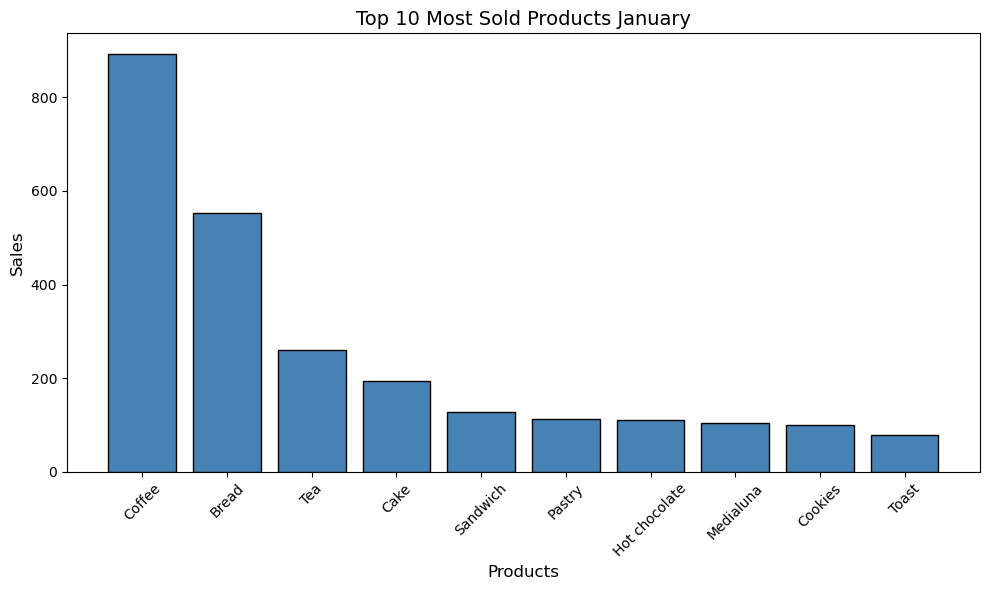

In [86]:
January1 = ['January']
filtered_data = bre[bre['Month'].isin(January1)]

item_counts = filtered_data['Item'].value_counts()

top_10_items = item_counts.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_items.index, top_10_items.values, color='steelblue', edgecolor='black')

plt.title('Top 10 Most Sold Products January', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10) 

plt.tight_layout()
plt.show()

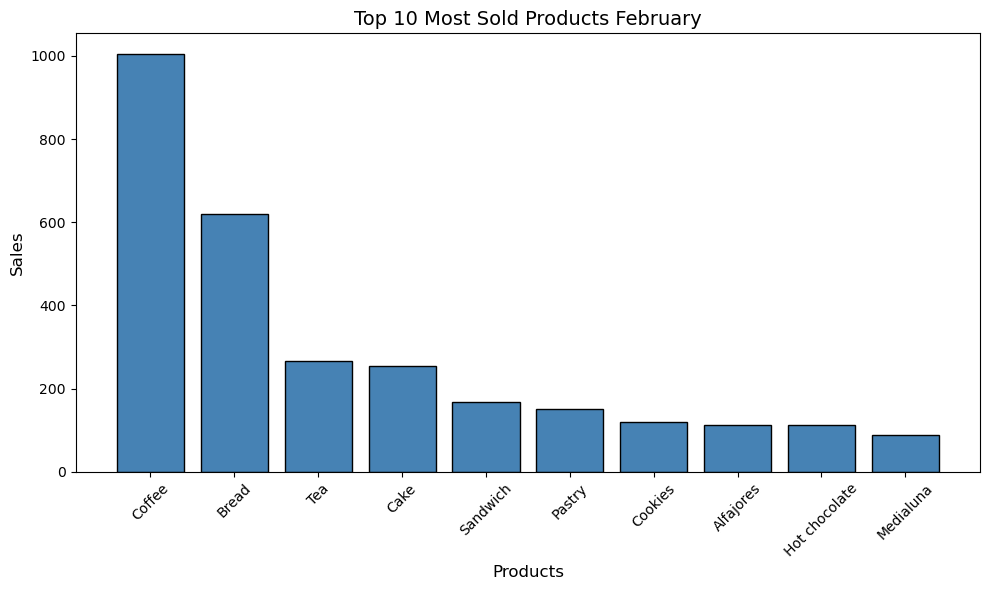

In [87]:
February1 = ['February']
filtered_data = bre[bre['Month'].isin(February1)]

item_counts = filtered_data['Item'].value_counts()

top_10_items = item_counts.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_items.index, top_10_items.values, color='steelblue', edgecolor='black')

plt.title('Top 10 Most Sold Products February', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10) 

plt.tight_layout()
plt.show()

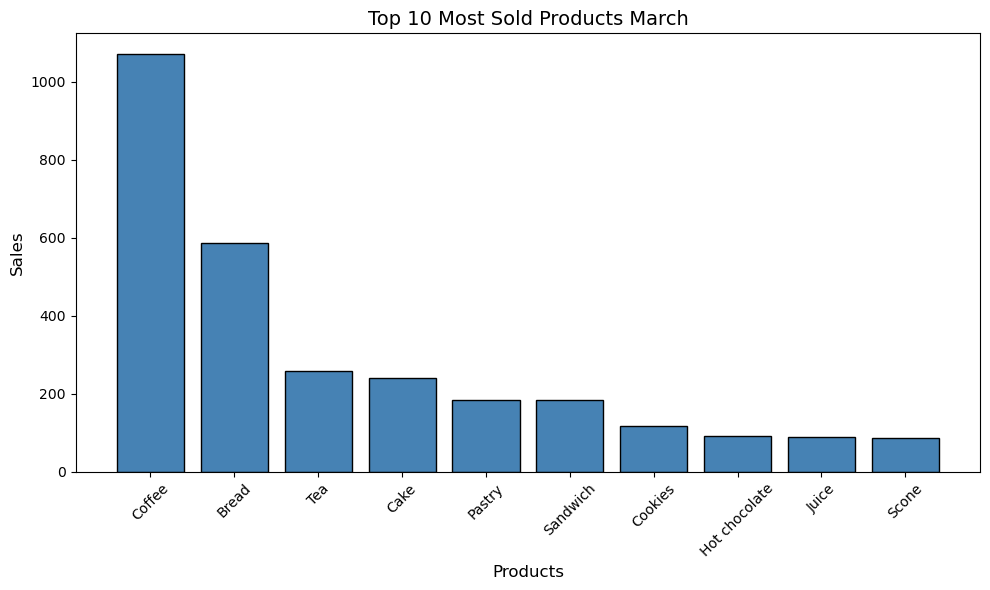

In [88]:
March1 = ['March']
filtered_data = bre[bre['Month'].isin(March1)]

item_counts = filtered_data['Item'].value_counts()

top_10_items = item_counts.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_items.index, top_10_items.values, color='steelblue', edgecolor='black')

plt.title('Top 10 Most Sold Products March', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10) 

plt.tight_layout()
plt.show()

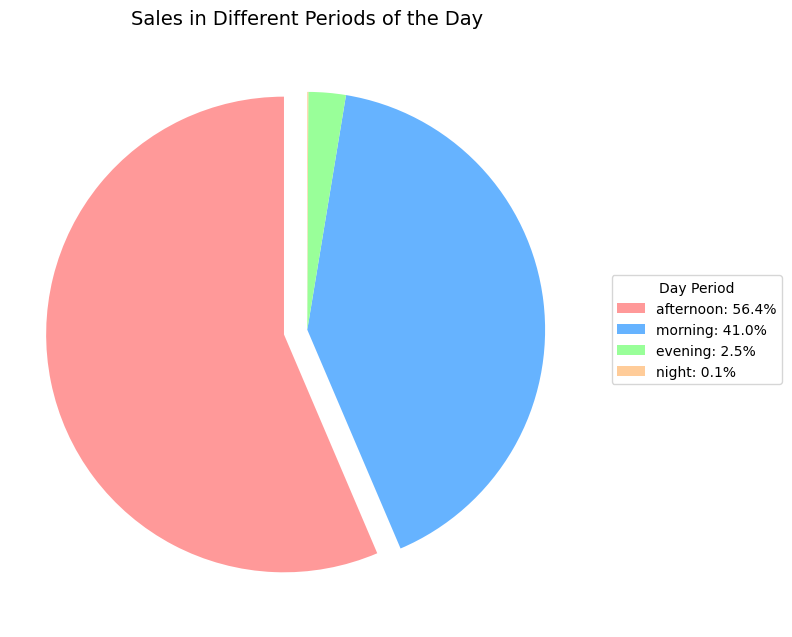

In [89]:
period_counts = bre['Period Day'].value_counts()

percentages = (period_counts / period_counts.sum()) * 100

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts = ax.pie(
    percentages.values,
    labels=None,        
    startangle=90,       
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], 
    explode=(0.1, 0, 0, 0) 
)


legend_labels = [f"{label}: {percentage:.1f}%" for label, percentage in zip(percentages.index, percentages.values)]


ax.legend(
    wedges,  
    legend_labels,  
    title="Day Period",
    loc="center left",  
    bbox_to_anchor=(1, 0, 0.5, 1)  
)

plt.title("Sales in Different Periods of the Day", fontsize=14)
plt.tight_layout()

plt.show()

/opt/anaconda3/lib/python3.12/site-packages/dash/_jupyter.py:29: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  _dash_comm = Comm(target_name="dash")
/opt/anaconda3/lib/python3.12/site-packages/dash/dash.py:2282: DeprecationWarning:

Dash.run_server is deprecated and will be removed in Dash 3.0

/opt/anaconda3/lib/python3.12/site-packages/dash/dash.py:1814: DeprecationWarning:

'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead



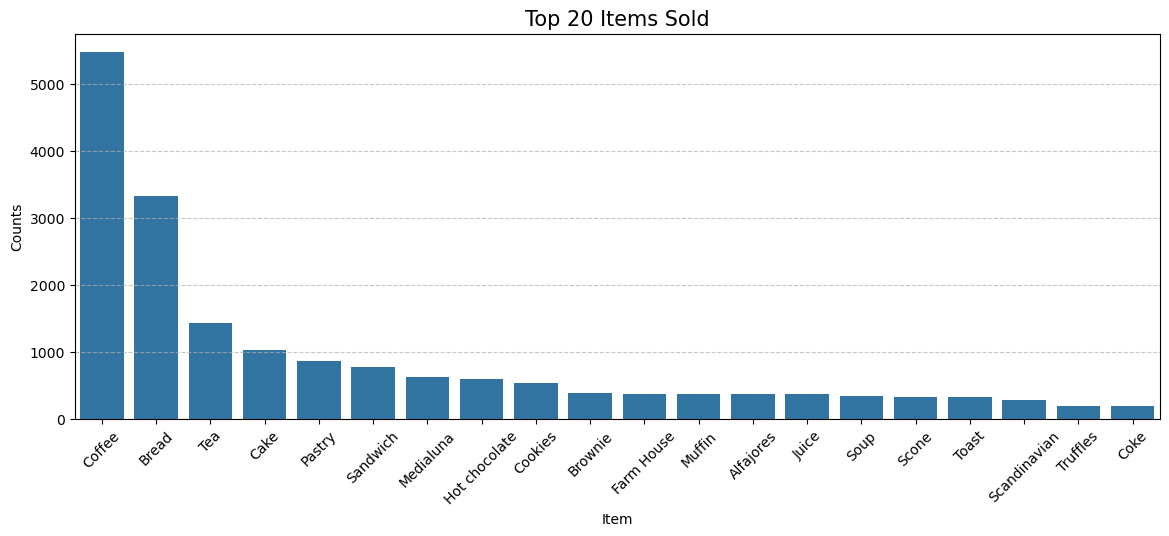

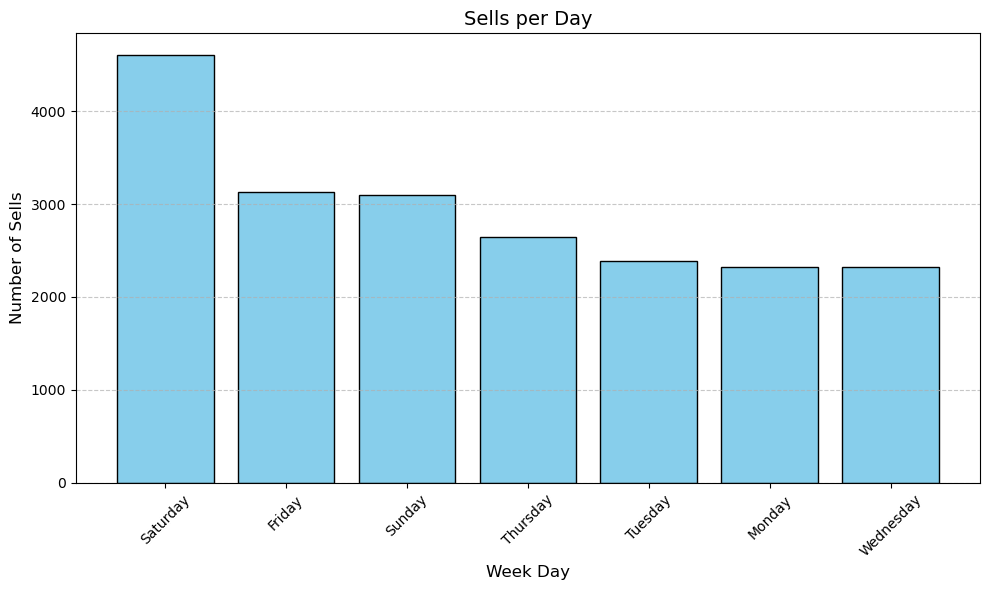

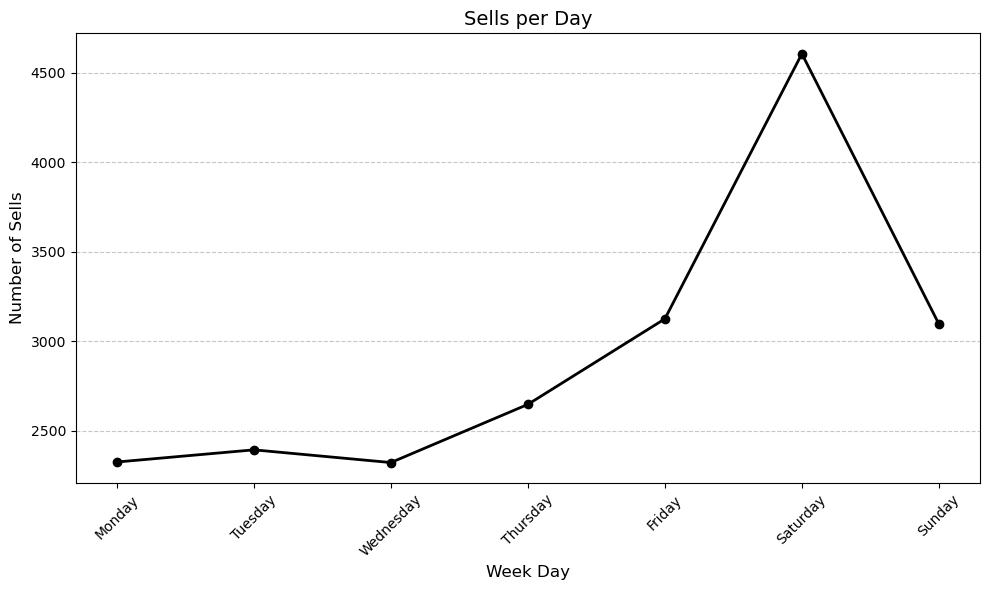

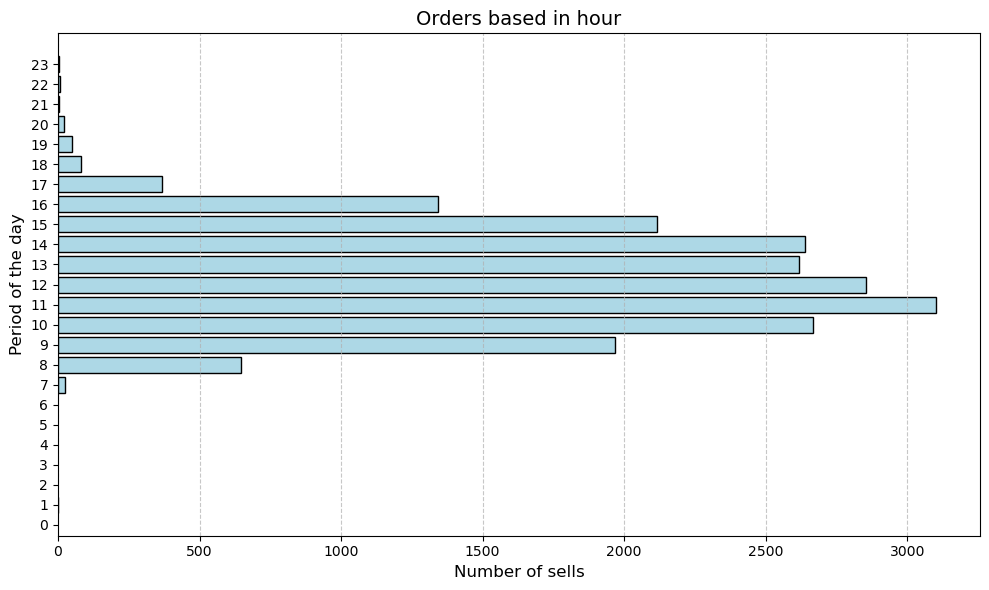

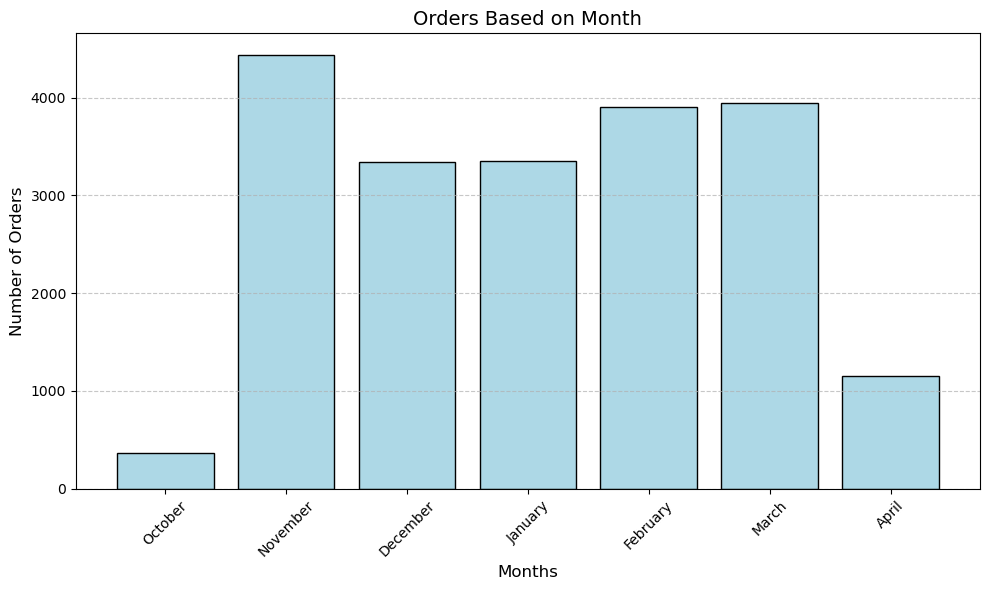

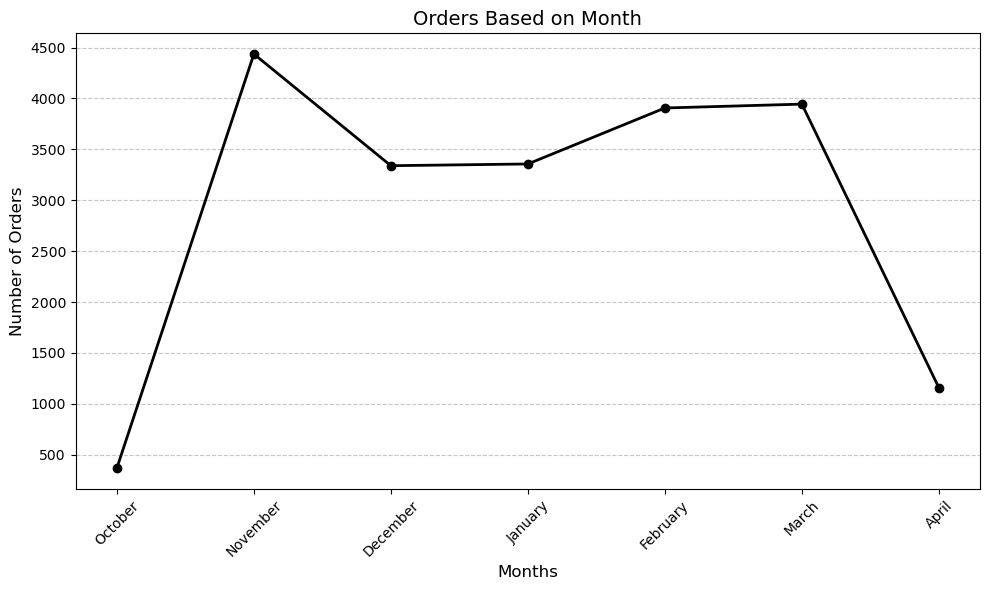

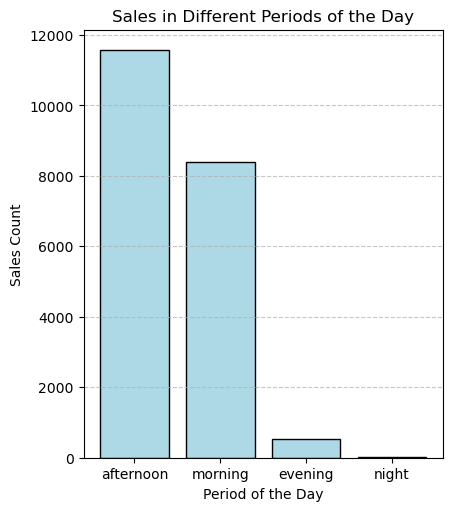

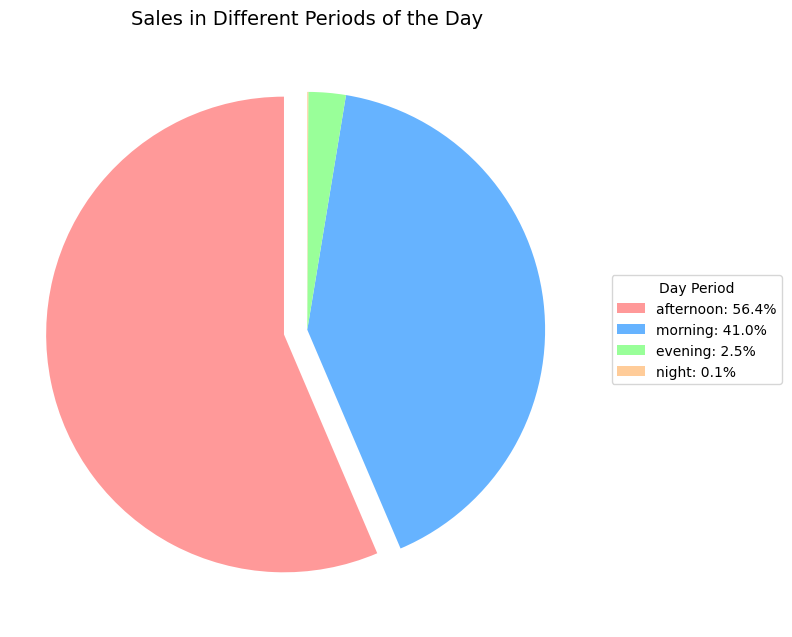

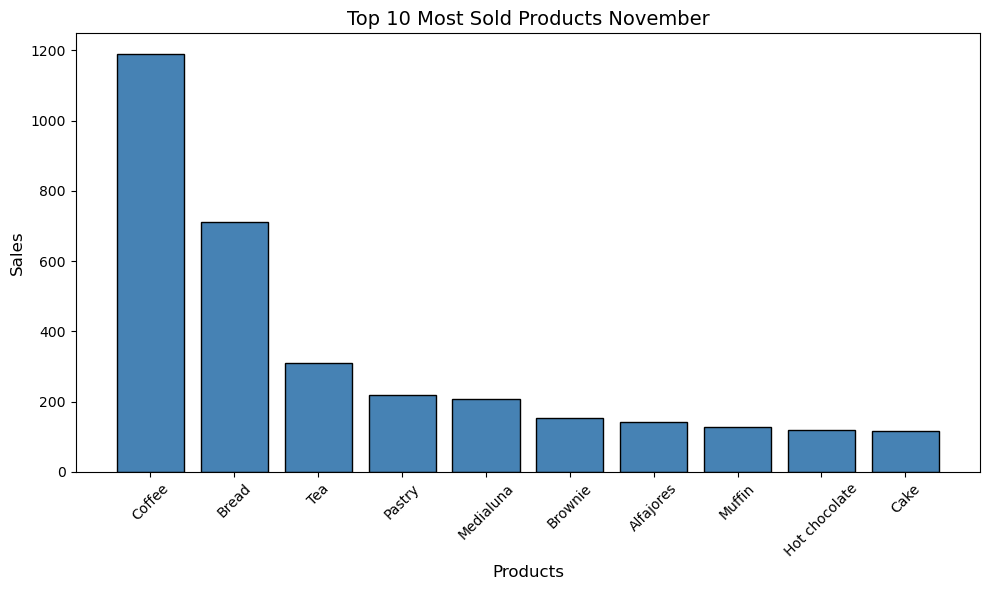

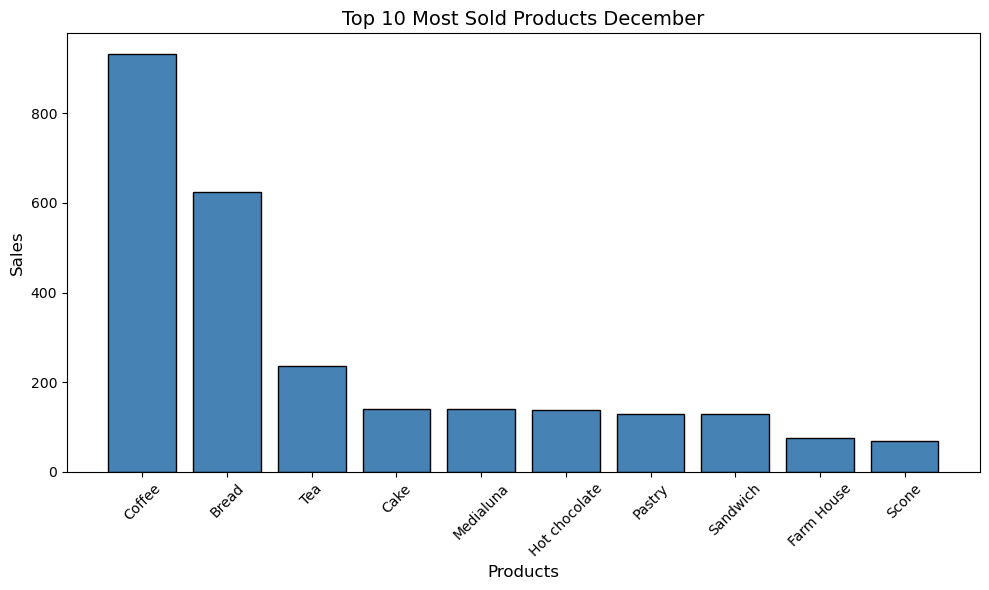

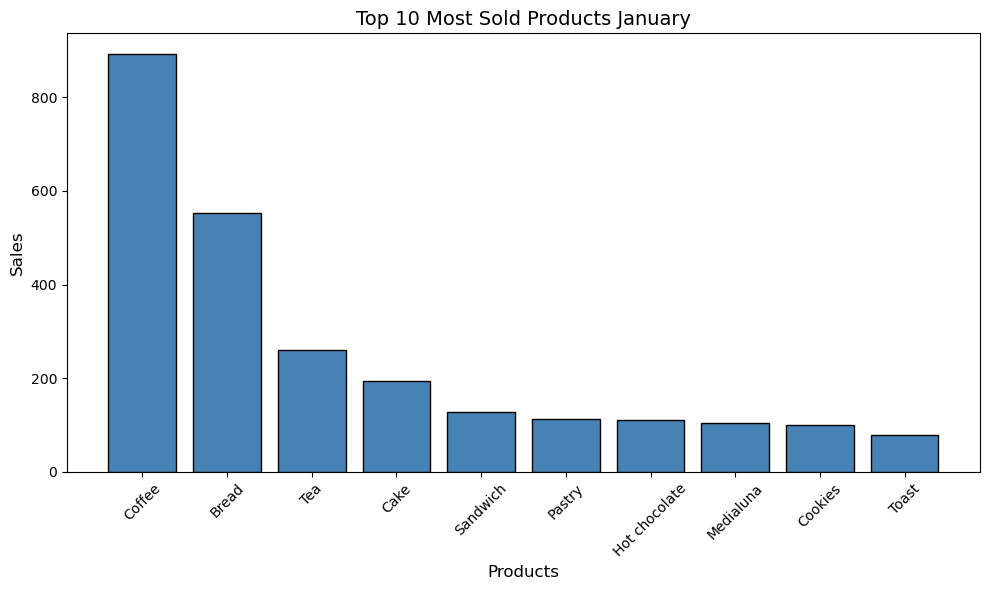

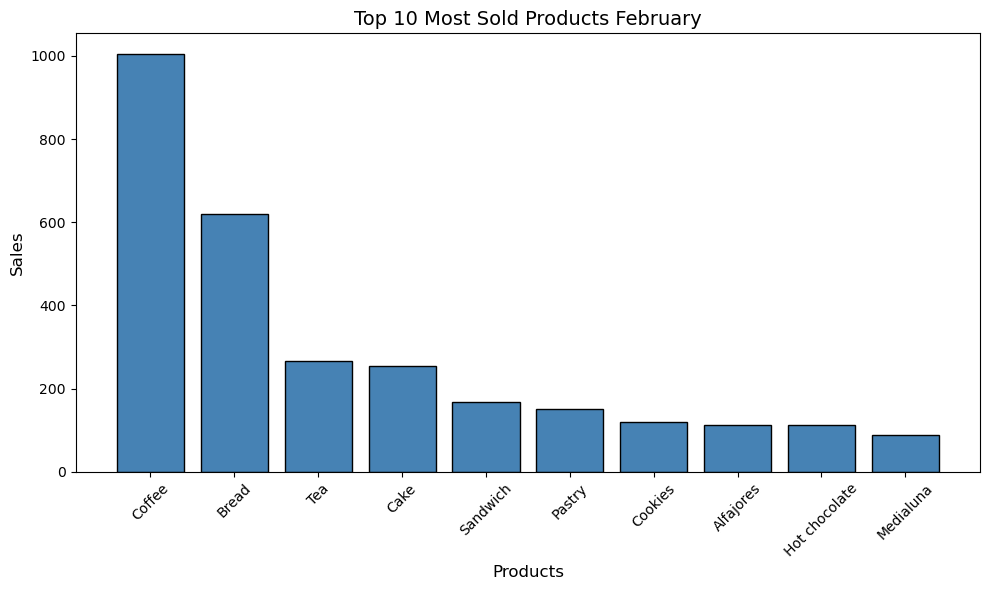

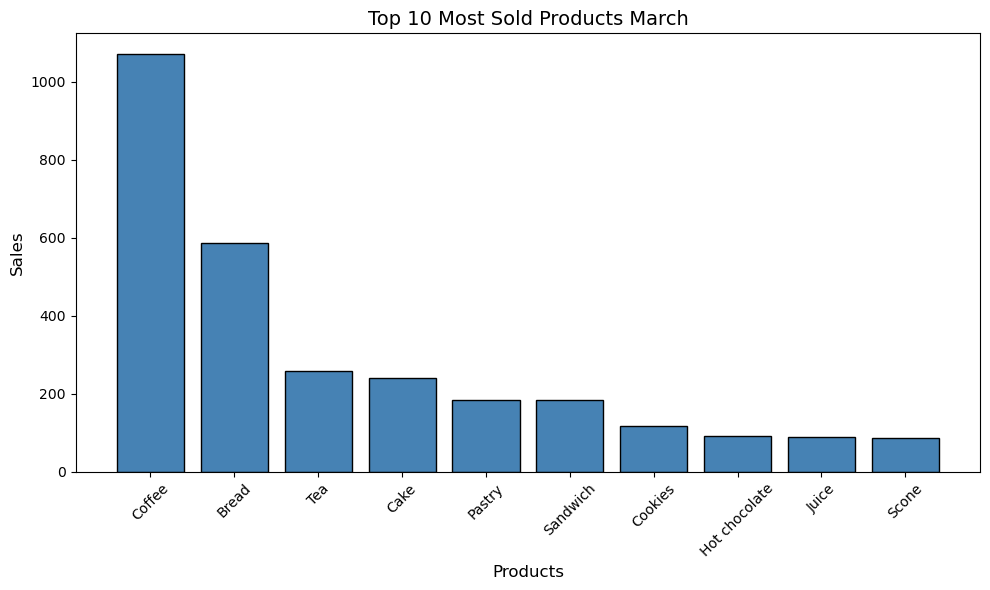

In [90]:
import dash
from dash import dcc, html
import matplotlib.pyplot as plt
import io
import base64

def matplotlib_to_dash(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format="png")
    buf.seek(0)
    encoded_image = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()
    return f"data:image/png;base64,{encoded_image}"


# Plot 1
fig1 = plt.figure()
plt.figure(figsize=(14, 5))
sns.barplot(x=bre.Item.value_counts().head(20).index, y=df.Item.value_counts().head(20))
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('Top 20 Items Sold', fontsize=15, color='Black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.close(fig1)

# Plot 2
fig2 = plt.figure()
Week_days = ["Saturday", "Friday", "Sunday", "Thursday", "Tuesday", "Monday", "Wednesday"]
Sells = [4605, 3124, 3095, 2646, 2392, 2324, 2321]

plt.figure(figsize=(10, 6))
plt.bar(Week_days, Sells, color='skyblue', edgecolor='black')

plt.title("Sells per Day", fontsize=14)
plt.xlabel("Week Day", fontsize=12)
plt.ylabel("Number of Sells", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.close(fig2)


# Plot 3
fig3 = plt.figure()
Week_days = ["Saturday", "Friday", "Sunday", "Thursday", "Tuesday", "Monday", "Wednesday"]
Sells = [4605, 3124, 3095, 2646, 2392, 2324, 2321]
ordered_week_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ordered_sells = [Sells[Week_days.index(day)] for day in ordered_week_days]
plt.figure(figsize=(10, 6))
plt.plot(ordered_week_days, ordered_sells, marker='o', color='black', linewidth=2)
plt.title("Sells per Day", fontsize=14)
plt.xlabel("Week Day", fontsize=12)
plt.ylabel("Number of Sells", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.close(fig3)


# Plot 4
fig4 = plt.figure()
hourly_counts = bre['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.barh(hourly_counts.index, hourly_counts.values, color='lightblue', edgecolor='black')
plt.title("Orders based in hour", fontsize=14)
plt.xlabel("Number of sells", fontsize=12)
plt.ylabel("Period of the day", fontsize=12)
plt.yticks(range(0, 24), fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.close(fig4)



# Plot 5
fig5 = plt.figure()
month_counts = bre['Month'].value_counts()
order = [
    "October", "November", "December", "January", "February", "March", "April"
]
month_counts = month_counts.reindex(order)
plt.figure(figsize=(10, 6))
plt.bar(month_counts.index, month_counts.values, color='lightblue', edgecolor='black')
plt.title("Orders Based on Month", fontsize=14)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.close(fig5)



# Plot 6
fig6 = plt.figure()
month_counts = bre['Month'].value_counts()
order = [
    "October", "November", "December", "January", "February", "March", "April"
]
month_counts = month_counts.reindex(order)
plt.figure(figsize=(10, 6))
plt.plot(month_counts, marker='o', color='black', linewidth=2)
plt.title("Orders Based on Month", fontsize=14)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.close(fig6)



# Plot 7
fig7 = plt.figure()
day_type_counts = bre['Day'].value_counts()
period_day_counts = bre['Period Day'].value_counts()
fig = plt.figure(figsize=(8, 5), constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax2 = fig.add_subplot(spec[0, 1])
ax2.bar(period_day_counts.index, period_day_counts.values, color='lightblue', edgecolor='black')
ax2.set_title('Sales in Different Periods of the Day', color='black')
ax2.set_xlabel('Period of the Day')
ax2.set_ylabel('Sales Count')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
plt.close(fig7)


# Plot 8
fig8 = plt.figure()
period_counts = bre['Period Day'].value_counts()
percentages = (period_counts / period_counts.sum()) * 100
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts = ax.pie(
    percentages.values,
    labels=None,        
    startangle=90,       
    colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], 
    explode=(0.1, 0, 0, 0) 
)
legend_labels = [f"{label}: {percentage:.1f}%" for label, percentage in zip(percentages.index, percentages.values)]
ax.legend(
    wedges,  
    legend_labels,  
    title="Day Period",
    loc="center left",  
    bbox_to_anchor=(1, 0, 0.5, 1)  
)
plt.title("Sales in Different Periods of the Day", fontsize=14)
plt.tight_layout()
plt.close(fig8)


# Plot 9
fig9 = plt.figure()
November1 = ['November']
filtered_data = bre[bre['Month'].isin(November1)]
item_counts = filtered_data['Item'].value_counts()
top_10_items = item_counts.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_items.index, top_10_items.values, color='steelblue', edgecolor='black')
plt.title('Top 10 Most Sold Products November', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10) 
plt.tight_layout()
plt.close(fig9)


# Plot 10
fig10 = plt.figure()
December1 = ['December']
filtered_data = bre[bre['Month'].isin(December1)]
item_counts = filtered_data['Item'].value_counts()
top_10_items = item_counts.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_items.index, top_10_items.values, color='steelblue', edgecolor='black')
plt.title('Top 10 Most Sold Products December', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10) 
plt.tight_layout()
plt.close(fig10)

# Plot 11
fig11 = plt.figure()
January1 = ['January']
filtered_data = bre[bre['Month'].isin(January1)]
item_counts = filtered_data['Item'].value_counts()
top_10_items = item_counts.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_items.index, top_10_items.values, color='steelblue', edgecolor='black')
plt.title('Top 10 Most Sold Products January', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10) 
plt.tight_layout()
plt.close(fig11)


# Plot 12
fig12 = plt.figure()
February1 = ['February']
filtered_data = bre[bre['Month'].isin(February1)]
item_counts = filtered_data['Item'].value_counts()
top_10_items = item_counts.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_items.index, top_10_items.values, color='steelblue', edgecolor='black')
plt.title('Top 10 Most Sold Products February', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10) 
plt.tight_layout()
plt.close(fig12)


# Plot 13
fig13 = plt.figure()
March1 = ['March']
filtered_data = bre[bre['Month'].isin(March1)]
item_counts = filtered_data['Item'].value_counts()
top_10_items = item_counts.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_items.index, top_10_items.values, color='steelblue', edgecolor='black')
plt.title('Top 10 Most Sold Products March', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10) 
plt.tight_layout()
plt.close(fig13)




app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Dashboard The Bread Basket - Integrated CA2 (DVT and MLB) ", style={"textAlign": "center"}),
    
    html.Div([
        html.Div([
            html.Img(src=matplotlib_to_dash(fig1), style={"width": "100%"})
        ], style={"width": "30%", "display": "inline-block", "padding": "10px"}),

        html.Div([
            html.Img(src=matplotlib_to_dash(fig2), style={"width": "100%"})
        ], style={"width": "30%", "display": "inline-block", "padding": "10px"}),

        html.Div([
            html.Img(src=matplotlib_to_dash(fig3), style={"width": "100%"})
        ], style={"width": "30%", "display": "inline-block", "padding": "10px"})
    ], style={"textAlign": "center"})
])

if __name__ == '__main__':
 app.run_server(debug=True, host='192.168.0.207', port=8050)

In [ ]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns

def plot_in_tkinter(fig, window, row, col):
    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas.draw()
    canvas.get_tk_widget().grid(row=row, column=col, padx=10, pady=10)

root = tk.Tk()
root.title("Gráficos do Tkinter")
root.geometry("120000x80000")  
root.resizable(True, True) 


# Plot 1
fig1 = plt.figure(figsize=(14, 5))
sns.barplot(x=bre.Item.value_counts().head(20).index, y=bre.Item.value_counts().head(20))
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('Top 20 Items Sold', fontsize=15, color='Black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.close(fig1)
plot_in_tkinter(fig1, root, 0, 0)

# Plot 2
fig2 = plt.figure(figsize=(10, 6))
Week_days = ["Saturday", "Friday", "Sunday", "Thursday", "Tuesday", "Monday", "Wednesday"]
Sells = [4605, 3124, 3095, 2646, 2392, 2324, 2321]
plt.bar(Week_days, Sells, color='skyblue', edgecolor='black')
plt.title("Sells per Day", fontsize=14)
plt.xlabel("Week Day", fontsize=12)
plt.ylabel("Number of Sells", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.close(fig2)
plot_in_tkinter(fig2, root, 0, 1)

# Plot 3
fig3 = plt.figure(figsize=(10, 6))
ordered_week_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ordered_sells = [Sells[Week_days.index(day)] for day in ordered_week_days]
plt.plot(ordered_week_days, ordered_sells, marker='o', color='black', linewidth=2)
plt.title("Sells per Day", fontsize=14)
plt.xlabel("Week Day", fontsize=12)
plt.ylabel("Number of Sells", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.close(fig3)
plot_in_tkinter(fig3, root, 1, 0)

# Plot 4
fig4 = plt.figure(figsize=(10, 6))
hourly_counts = bre['Hour'].value_counts().sort_index()
plt.barh(hourly_counts.index, hourly_counts.values, color='lightblue', edgecolor='black')
plt.title("Orders based in hour", fontsize=14)
plt.xlabel("Number of sells", fontsize=12)
plt.ylabel("Period of the day", fontsize=12)
plt.yticks(range(0, 24), fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.close(fig4)
plot_in_tkinter(fig4, root, 1, 1)

# Plot 5
fig5 = plt.figure(figsize=(10, 6))
month_counts = bre['Month'].value_counts()
order = ["October", "November", "December", "January", "February", "March", "April"]
month_counts = month_counts.reindex(order)
plt.bar(month_counts.index, month_counts.values, color='lightblue', edgecolor='black')
plt.title("Orders Based on Month", fontsize=14)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.close(fig5)
plot_in_tkinter(fig5, root, 2, 0)

# Plot 6
fig6 = plt.figure(figsize=(10, 6))
month_counts = bre['Month'].value_counts()
order = ["October", "November", "December", "January", "February", "March", "April"]
month_counts = month_counts.reindex(order)
plt.plot(month_counts, marker='o', color='black', linewidth=2)
plt.title("Orders Based on Month", fontsize=14)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.close(fig6)
plot_in_tkinter(fig6, root, 2, 1)

# Plot 7
fig7 = plt.figure(figsize=(8, 5))
period_day_counts = bre['Period Day'].value_counts()
ax2 = fig7.add_subplot(111)
ax2.bar(period_day_counts.index, period_day_counts.values, color='lightblue', edgecolor='black')
ax2.set_title('Sales in Different Periods of the Day', color='black')
ax2.set_xlabel('Period of the Day')
ax2.set_ylabel('Sales Count')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
plt.close(fig7)
plot_in_tkinter(fig7, root, 3, 0)

# Plot 8
fig8 = plt.figure(figsize=(8, 8))
period_counts = bre['Period Day'].value_counts()
percentages = (period_counts / period_counts.sum()) * 100
ax = fig8.add_subplot(111)
wedges, texts = ax.pie(percentages.values, labels=None, startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], explode=(0.1, 0, 0, 0))
legend_labels = [f"{label}: {percentage:.1f}%" for label, percentage in zip(period_counts.index, period_counts.values)]
ax.legend(wedges, legend_labels, title="Day Period", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Sales in Different Periods of the Day", fontsize=14)
plt.tight_layout()
plt.close(fig8)
plot_in_tkinter(fig8, root, 3, 1)

# Plot 9
fig9 = plt.figure(figsize=(10, 6))
November1 = ['November']
filtered_data = bre[bre['Month'].isin(November1)]
item_counts = filtered_data['Item'].value_counts()
top_10_items = item_counts.head(10)
plt.bar(top_10_items.index, top_10_items.values, color='steelblue', edgecolor='black')
plt.title('Top 10 Most Sold Products November', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.close(fig9)
plot_in_tkinter(fig9, root, 4, 0)

# Plot 10
fig10 = plt.figure(figsize=(10, 6))
December1 = ['December']
filtered_data = bre[bre['Month'].isin(December1)]
item_counts = filtered_data['Item'].value_counts()
top_10_items = item_counts.head(10)
plt.bar(top_10_items.index, top_10_items.values, color='steelblue', edgecolor='black')
plt.title('Top 10 Most Sold Products December', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.close(fig10)
plot_in_tkinter(fig10, root, 4, 1)

# Plot 11
fig11 = plt.figure(figsize=(10, 6))
January1 = ['January']
filtered_data = bre[bre['Month'].isin(January1)]
item_counts = filtered_data['Item'].value_counts()
top_10_items = item_counts.head(10)
plt.bar(top_10_items.index, top_10_items.values, color='steelblue', edgecolor='black')
plt.title('Top 10 Most Sold Products January', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.close(fig11)
plot_in_tkinter(fig11, root, 5, 0)

# Plot 12
fig12 = plt.figure(figsize=(10, 6))
February1 = ['February']
filtered_data = bre[bre['Month'].isin(February1)]
item_counts = filtered_data['Item'].value_counts()
top_10_items = item_counts.head(10)
plt.bar(top_10_items.index, top_10_items.values, color='steelblue', edgecolor='black')
plt.title('Top 10 Most Sold Products February', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.close(fig12)
plot_in_tkinter(fig12, root, 5, 1)

# Plot13
fig13 = plt.figure(figsize=(10, 6))
March1 = ['March']
filtered_data = bre[bre['Month'].isin(March1)]
item_counts = filtered_data['Item'].value_counts()
top_10_items = item_counts.head(10)
plt.bar(top_10_items.index, top_10_items.values, color='steelblue', edgecolor='black')
plt.title('Top 10 Most Sold Products March', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.close(fig13)
plot_in_tkinter(fig13, root, 6, 0)

root.mainloop()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning:

backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.

